## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

**Install zipcode library**

In [ ]:
## unused gives error on import ##
!pip install uszipcode==1.0.1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=a38da4187b6cdf3b6bddf2cdafbf271bd9736a373a50f34586d953a62a1aa21a
  Stored in directory: /root/.cache/pip/wheels/f7/99/9c/d24e98c35f30eba0c367ad1e7888d396d676abb35fe1e7611c
Successfully built atomicwrites


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer
)
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data from google drive
Loan = pd.read_csv('/content/drive/MyDrive/Python File/Loan/Loan_Modelling.csv')
data = Loan.copy()

NameError: name 'pd' is not defined

## Data Overview

Print the first 5 rows of data

In [ ]:
# print first 5 rows of data
data.head()

Print the last 5 rows of data

In [ ]:
# print last 5 rows of data
data.tail()

In [ ]:
# Display the rows and columns in the data
data.shape

Data Types

In [ ]:
# explore column data types
data.info()

In [ ]:
# check stats of all the columns in data
data.describe().T

In [ ]:
# Display how many duplicate records are present in the dataset
data.duplicated().sum()

In [ ]:
# Display unique values in the dataset
data.nunique()

**Data Columns and proportion of their unique values**

In [ ]:
categorical_cols = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Display the percentage of unique categorical values in each column
for col in categorical_cols:
  print(data[col].value_counts(normalize = True, dropna = False).mul(100))
  print('-' * 50)


### Observations:

*   There are 5000 rows and 14 columns in the data set.
*   There are no duplicate records in the data set and there are no missing values in either column.
*   ID column is identity column, as it has 5000 unique values.
*   Zipcode is 5 digit zipcode.
*   Education column has negative values, likely anomalous values
*   Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, ZIPCode can be converted to binary or categorical data type


# Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

(Answered on basis of analysis below:)

1. **What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution**?

*   High right skewness in mortgage attribute.
*   There are large number of outliers above 3rd quartile.


2. **How many customers have credit cards?**

*   3530 customers have credit cards


3. **What are the attributes that have a strong correlation with the target attribute (personal loan)**?

* Income shows strong positive correlation with Personal Loan
* Education, CCAvg, Mortgage and Family also have positive correlation with personal loan


4. **How does a customer's interest in purchasing a loan vary with their age**?

*   Customers between age 35-55 have higher interest in purchasing loan


5. **How does a customer's interest in purchasing a loan vary with their education**?

*   Customers with education Advanced / Professional (category 3) have higher chance of purchasing a personal loan



In [ ]:
# Helper functions

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram



# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis


### Age

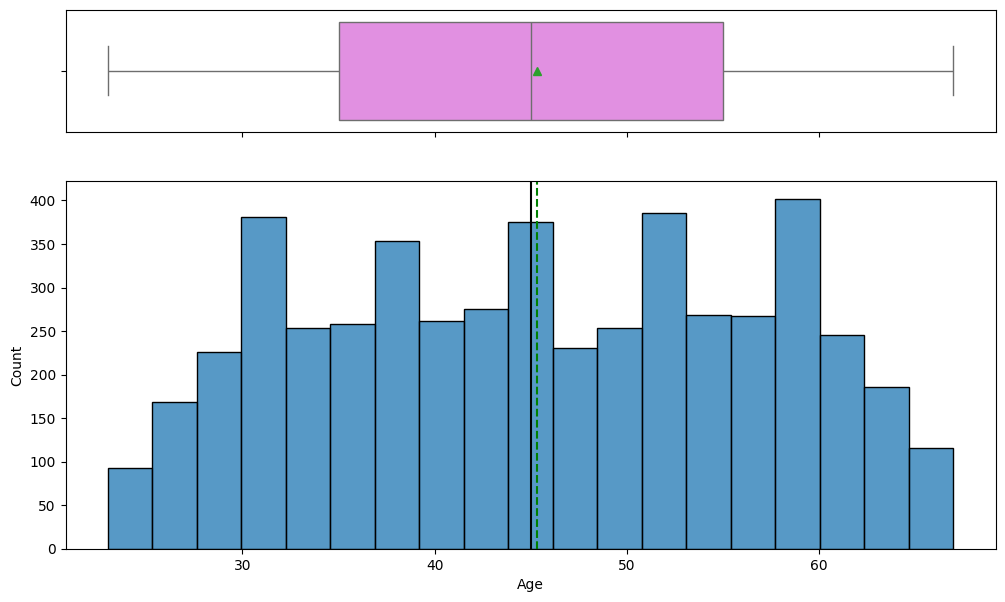

In [ ]:
histogram_boxplot(data, "Age")

#### Observations

*   For age, mean is close to median
*   The column shows uniform distribution
*   Average age is ~45
*   There are no outliers present for this column.



### Experience

Experience column has been treated and the negative values have been replaced by absolute values

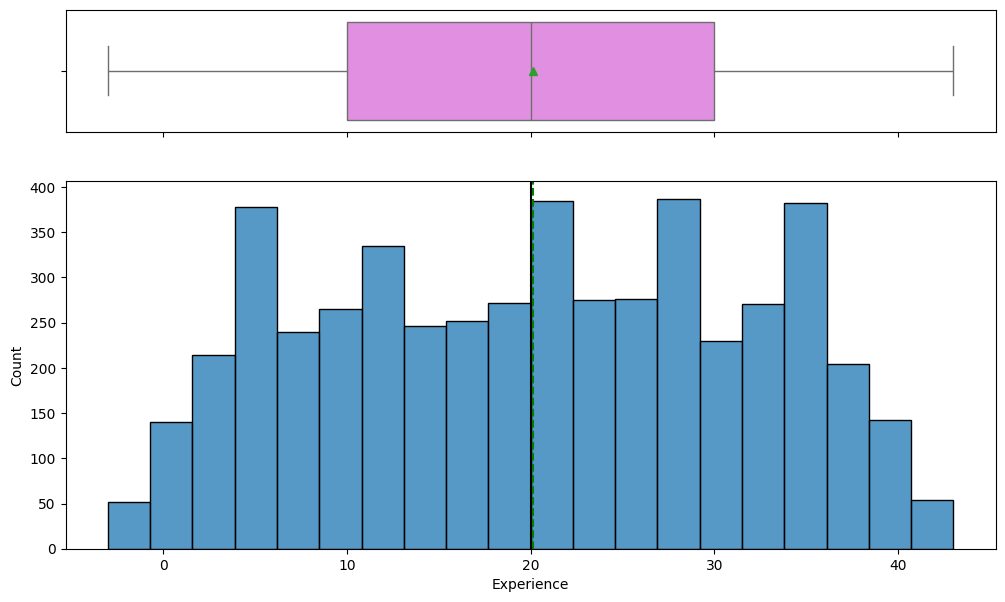

In [ ]:
# Observations on Experience
histogram_boxplot(data, "Experience") # histogram_boxplot for experience

#### Observations for Experience column:

*   Mean is close to median
*   Uniform distribution
*   Mean and Median ~20 years
*   There are no outliers present in this column
* There are some negative values in experience column, which can be treated during data preprocessing.



### Income

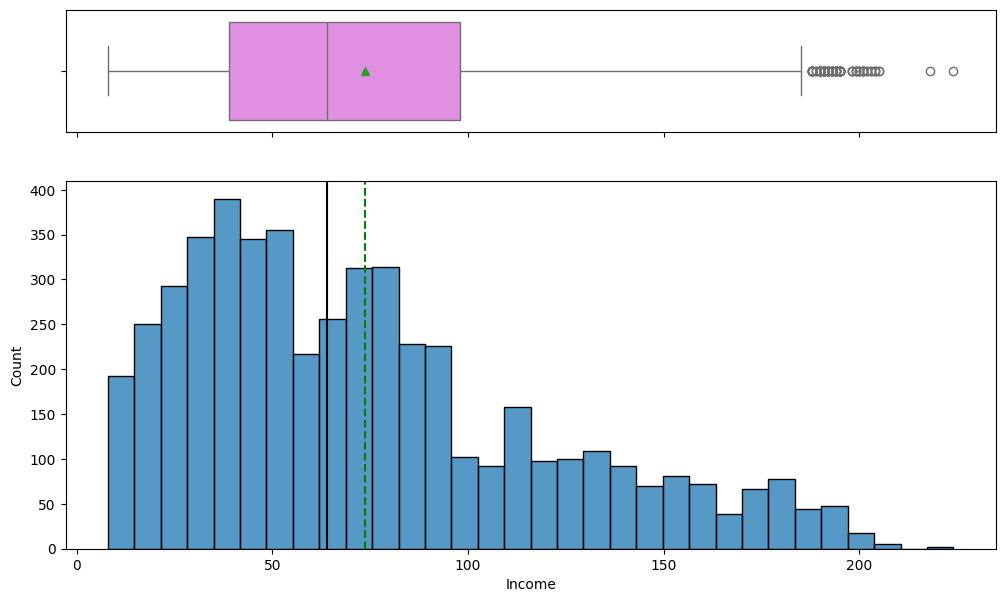

In [ ]:
histogram_boxplot(data, "Income")  ## histogram_boxplot for Income

#### Observations on Income column:

*   Income shows right skewed distribution
*   There are high income outliers
*   Mean is ~60K and Median is ~70K



### CCAvg

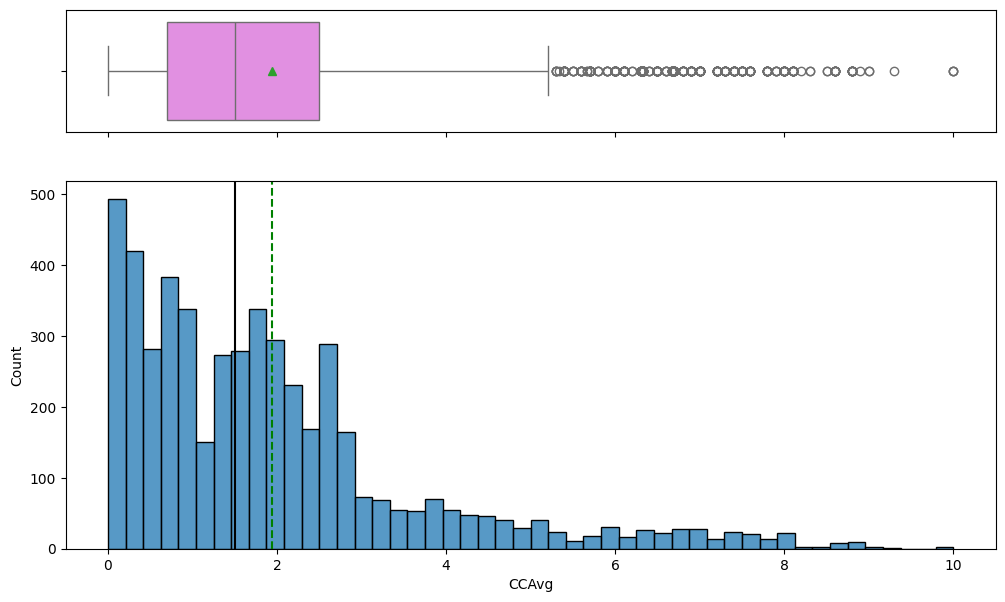

In [ ]:
histogram_boxplot(data, "CCAvg")  # create histogram_boxplot for Income

#### Observations on CCAvg column:

*   CCAvg graph is right skewed
*   Average value ~1.5k and median ~2k
*   There are outliers in the data



### Mortgage

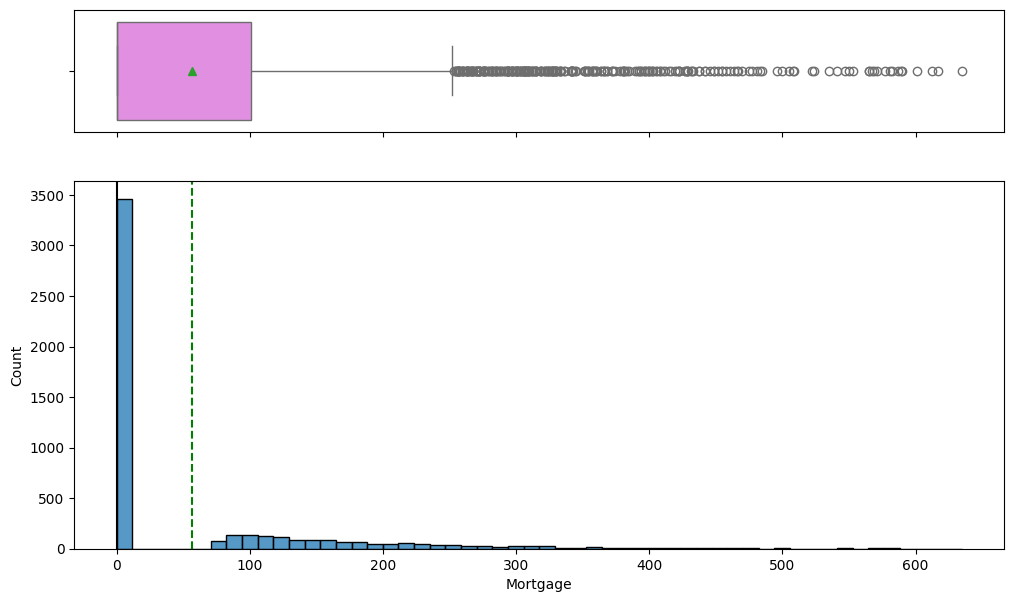

In [ ]:
histogram_boxplot(data, "Mortgage")  # create histogram_boxplot for Income

#### Observations on Mortgage column:

*   Mortgage is heavily right skewed.
*   Median is 0 and mean is ~60K.
*   There are a lot of zero values in mortgage column
*   The boxplot shows a lot of outliers on the right side.



### Family

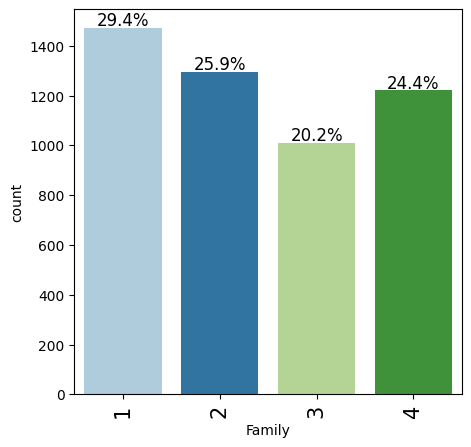

In [ ]:
labeled_barplot(data, "Family", perc=True)


*   Family with size 1 is has the largest proportion and family of size 3 has the least proportion in the dataset.


### Education

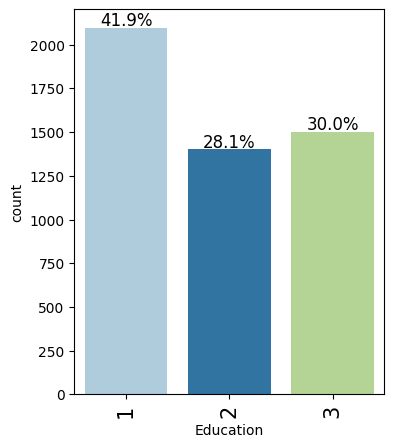

In [ ]:
labeled_barplot(data, "Education", perc=True)



*   Education has 3 categories: 1: Undergrad; 2: Graduate;3: Advanced/Professional
*   Undergrad (1) has the largest proportion (41.9%) and Graduate (category 2, 28.1%) has the least proprtion



### CD_Account

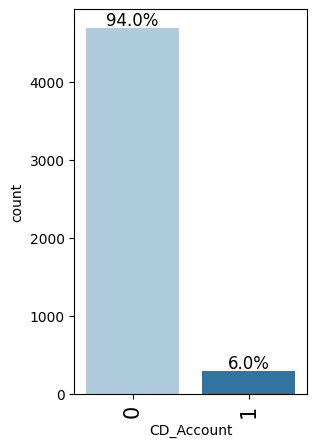

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)   # create labeled_barplot for CD_Account



*   94% of customers don't have a CD account



### Online

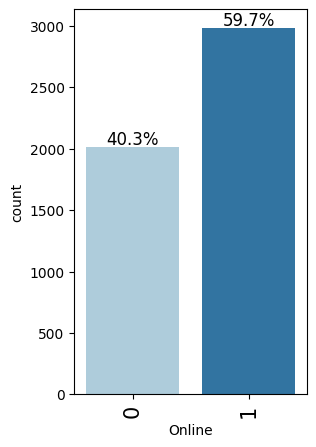

In [ ]:
labeled_barplot(data, "Online", perc=True)   # create labeled_barplot for Online



*   Approximately 60% of the customers use online banking facilities



### Securities_Account

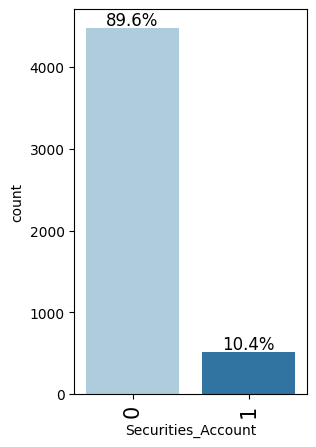

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)   # create labeled_barplot for Securities_Account



*   ~90 % customers don't have a securities account.



### CreditCard

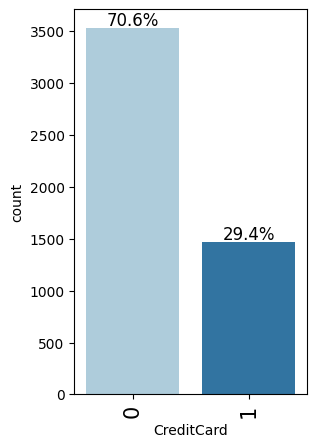

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)



*   ~70% of customers don't have a Credit card issued by the bank.



### ZIPCode

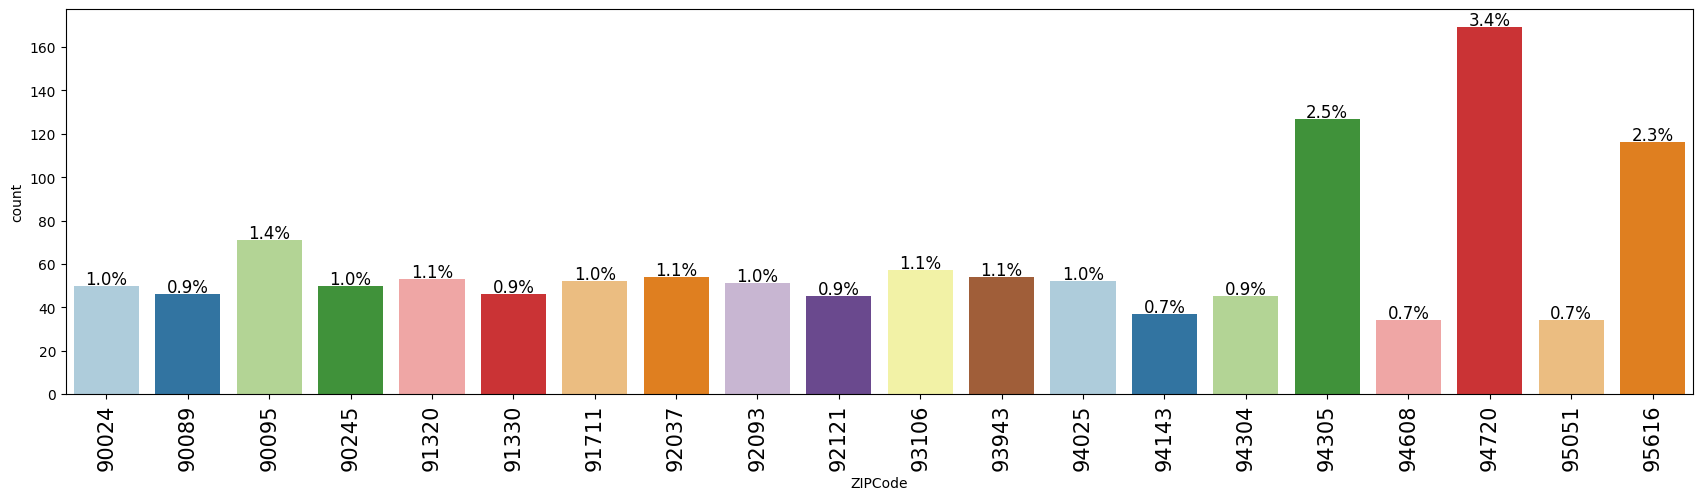

In [ ]:
# display top 20
labeled_barplot(data, "ZIPCode", perc=True, n=20)


*   94720 is the zipcode for 3.4% of rows.
*   Majority rows have zipcode begining with 94.


## Multivariate Analysis

In [ ]:
#### Helper functions

### Function to print the category counts and plot a stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation matrix for numerical columns

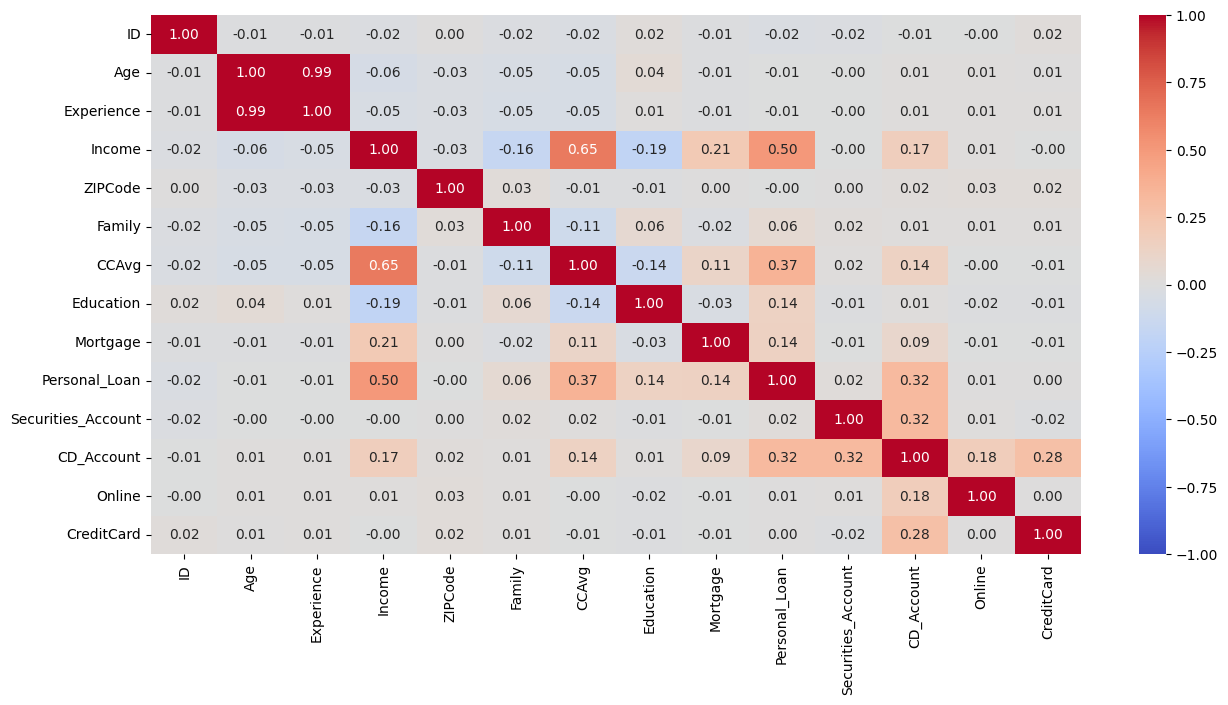

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm") # Complete the code to get the heatmap of the data
plt.show()



*   Age and Experience show very high positive correlation.
*   CCAvg and Income are positively correlated.



In [ ]:
# Display the relationships of Numerical Variables with regards to Personal_Loan
def show_pairplot(data, diag_kind = 'kde', height = 2, hue = None):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    diag_kind: str, optional
      The type of pairplot diagram, default: kde
    height: int, optional
      The plot size in inches, default: 2
    hue: str, optional
      To show the hue, default: None
  '''
  if hue:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height, hue = hue)
    ax.fig.suptitle('Relationship of Numerical Variables with regards to ' + hue, y = 1.005, size = 11)
  else:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height)
    ax.fig.suptitle('Relationship of Numerical Variables', y = 1.005, size = 11)

  plt.show()

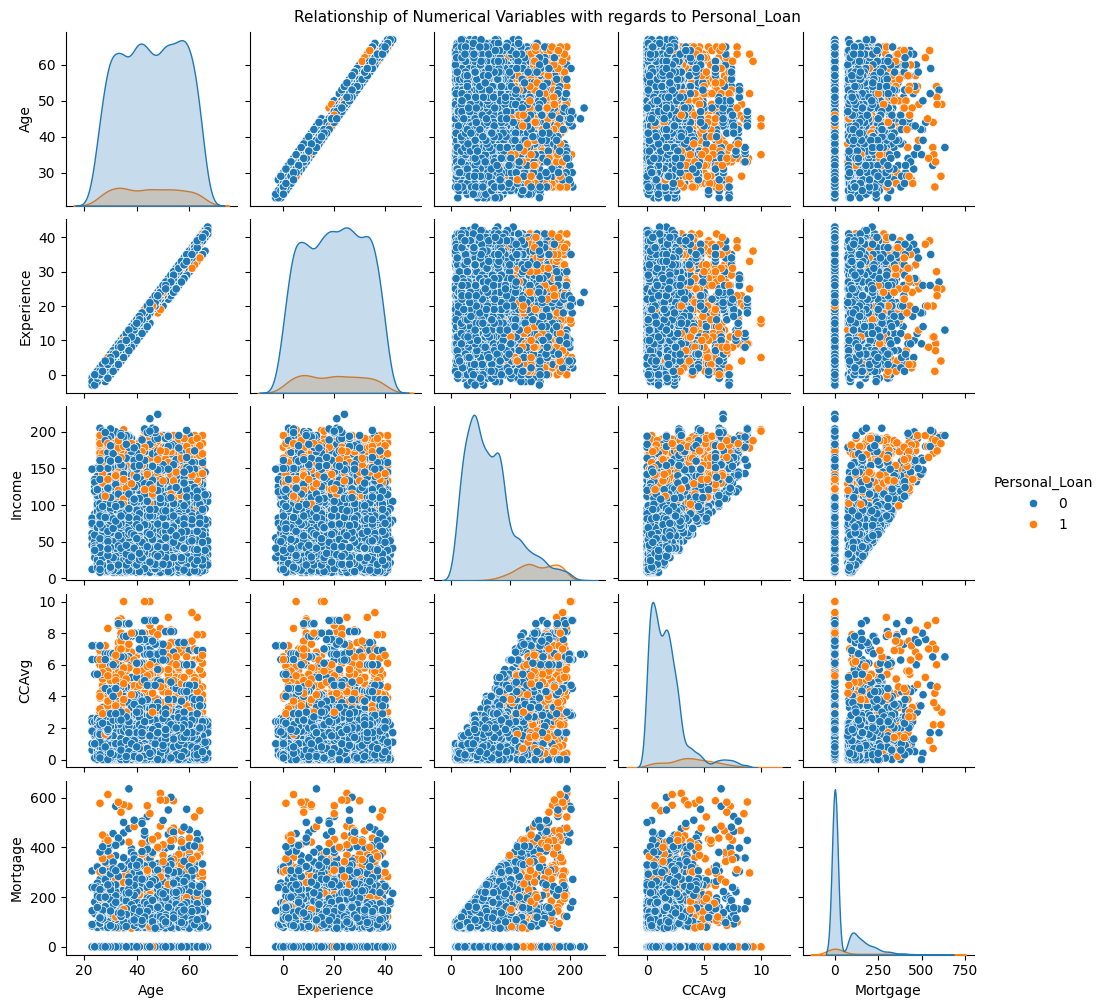

In [ ]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
show_pairplot(data = data[num_cols

                        + ['Personal_Loan']], hue = 'Personal_Loan')

Observations:

*  The orange dots represent customers with loan and the blue dots represent customers that don't have a personal loan.
*   Income and CCAvg show high positive correlation with Personal Loan.
*   Age and Experience show a strong positive correlation.
*   High Income and CCAvg customers are more likely to have a personal loan


## Bivariate Analysis

#### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


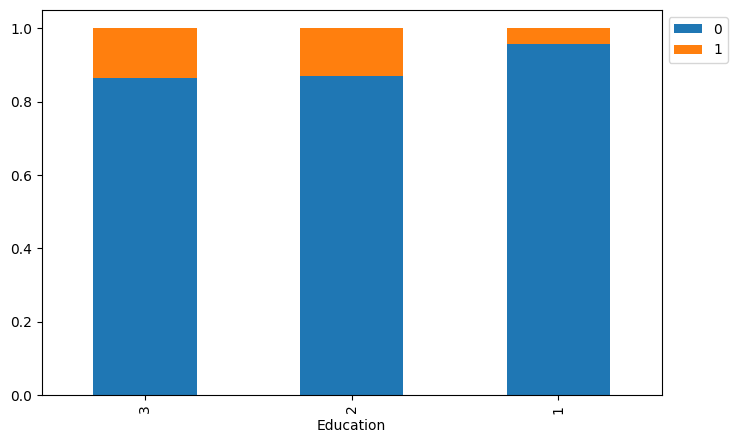

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

**Observations**

*   Customers with education categories Graduate(2) and Advanced/Proffesional (3) have higher % of Personal_Loans than Undergrad category (1).



#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


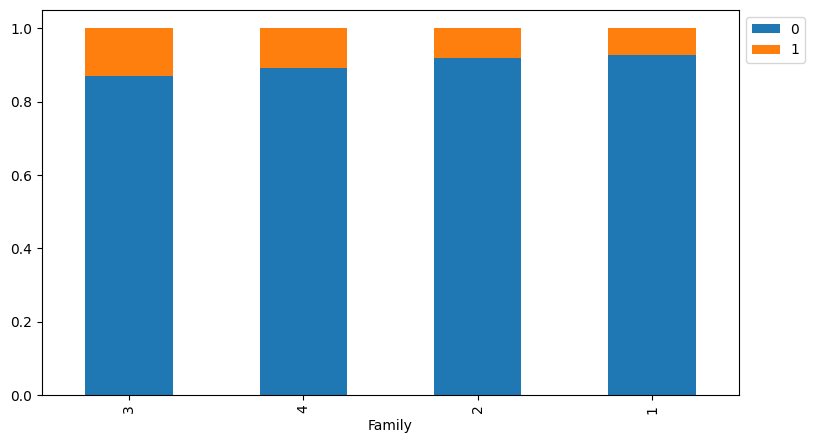

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")  # code to plot stacked barplot for Personal Loan and Family

**Observations**:


*   Customers with family size of 3 and 4 have more personal loans
*   Less than 10% of families have personal loan


#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


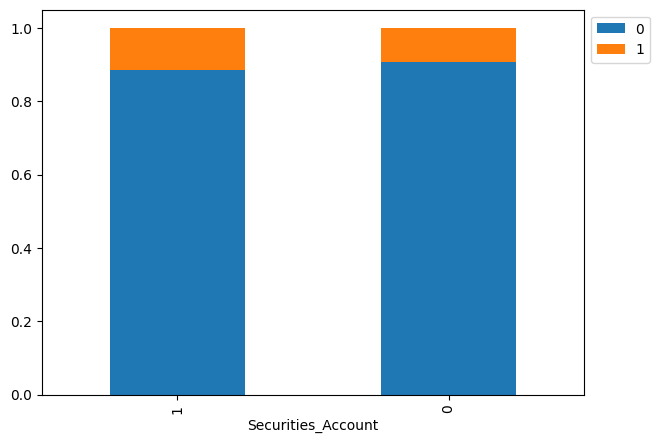

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") ## stacked barplot for Personal Loan and Securities_Account



*   Majority customers don't have Personal_Loan
*   More customers with personal loans have securities account than those without personal loans   



#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


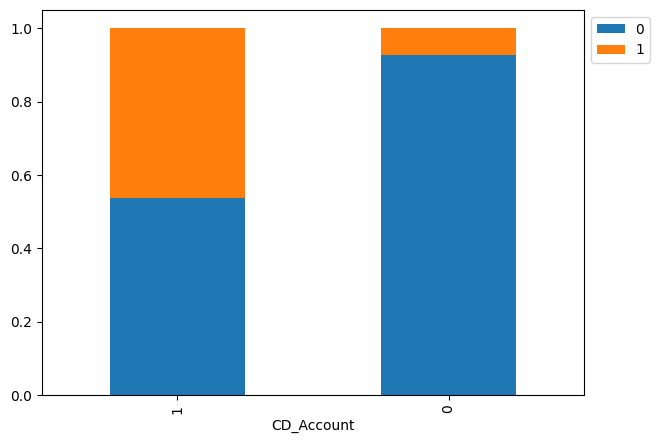

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan") ## stacked barplot for Personal Loan and CD_Account

**Observations**:



*   Customers with CD_Account have greater proportion of Personal_Loan than those that don't have a CD_Account
* Less than 10% customers have CD_Account



#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


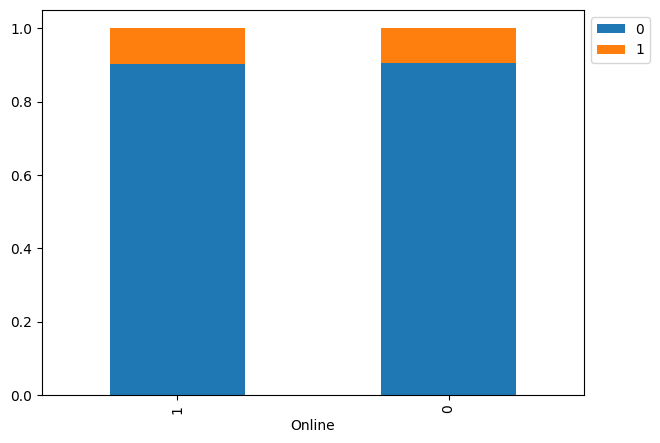

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan") # plot stacked barplot for Personal Loan and Online


**Observations:**
*   ~ 60% (2984/5000) of customers use online banking
*   The customers who use online banking are more likely to accept a personal loan than those who don't, though the difference is not significantly large.



#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


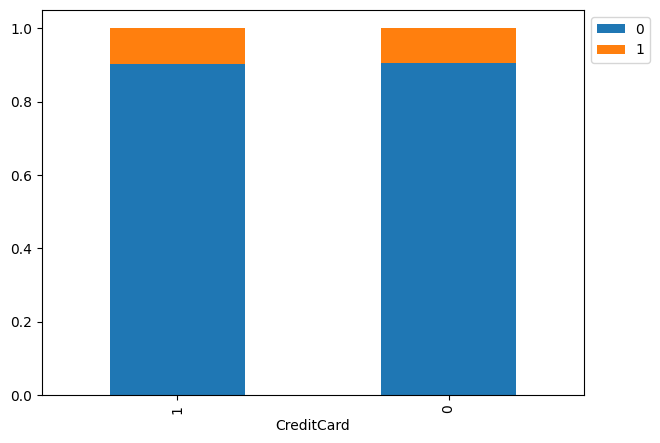

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan") # plot stacked barplot for Personal Loan and CreditCard

**Observations**:


*   ~70% of customers don't have a credit card.
*   Credit card has no significant correlation with personal loan, though there is a slightly higher chance of customers with credit card (9.73%) to accept a personal loan than those who don't have a credit card with the bank (9.55%).



#### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


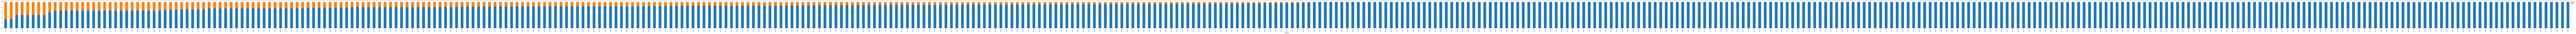

In [ ]:
stacked_barplot(data,"ZIPCode", "Personal_Loan") # plot stacked barplot for Personal Loan and ZIPCode

**Observations:**

*   Zipcode has no significant impact on personal loan.



#### Personal loan vs customer age

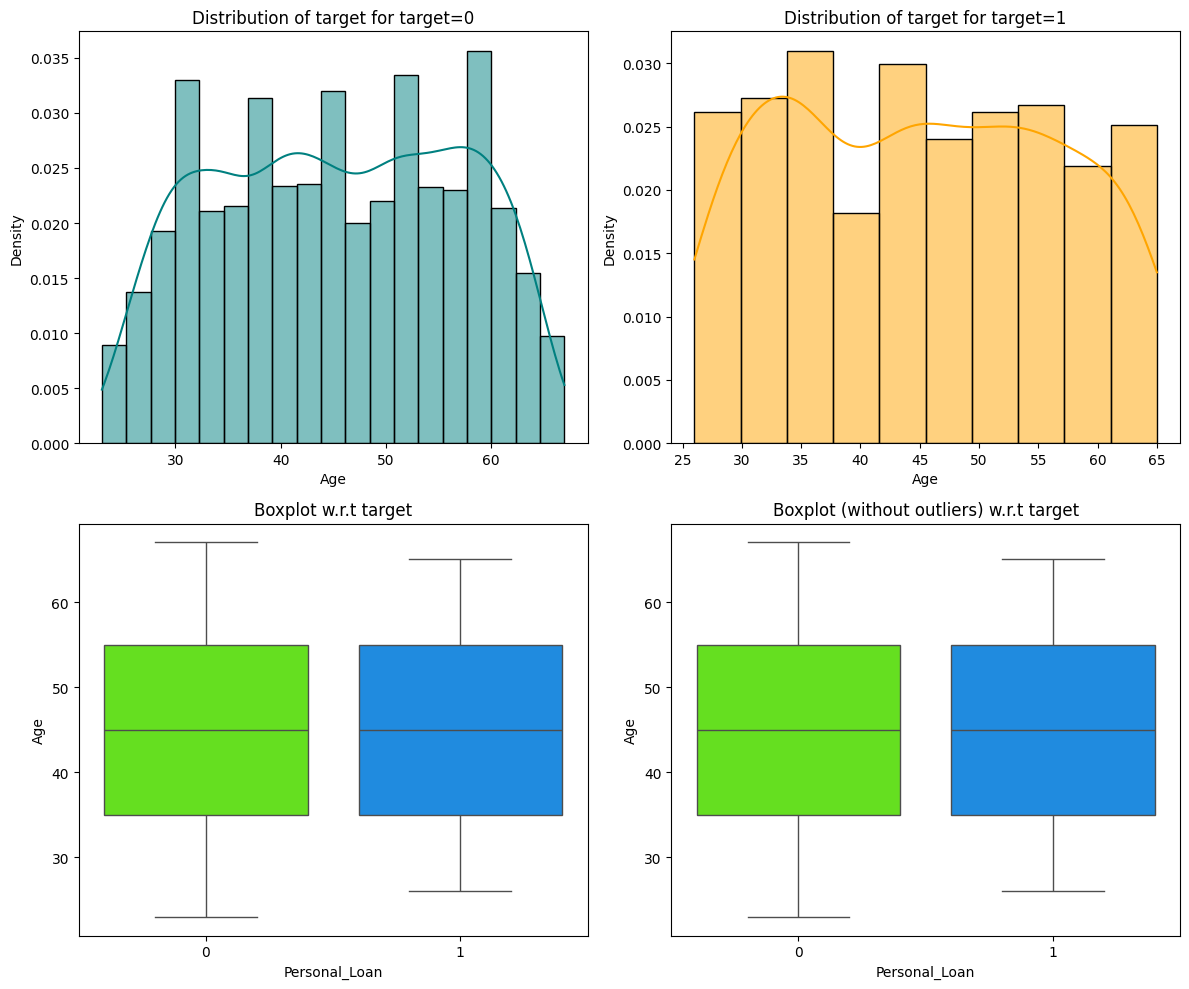

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**Observations**:


*   Age vs personal loan shows normal distribution.
*   There are no outliers in the data.



#### Personal Loan vs Experience

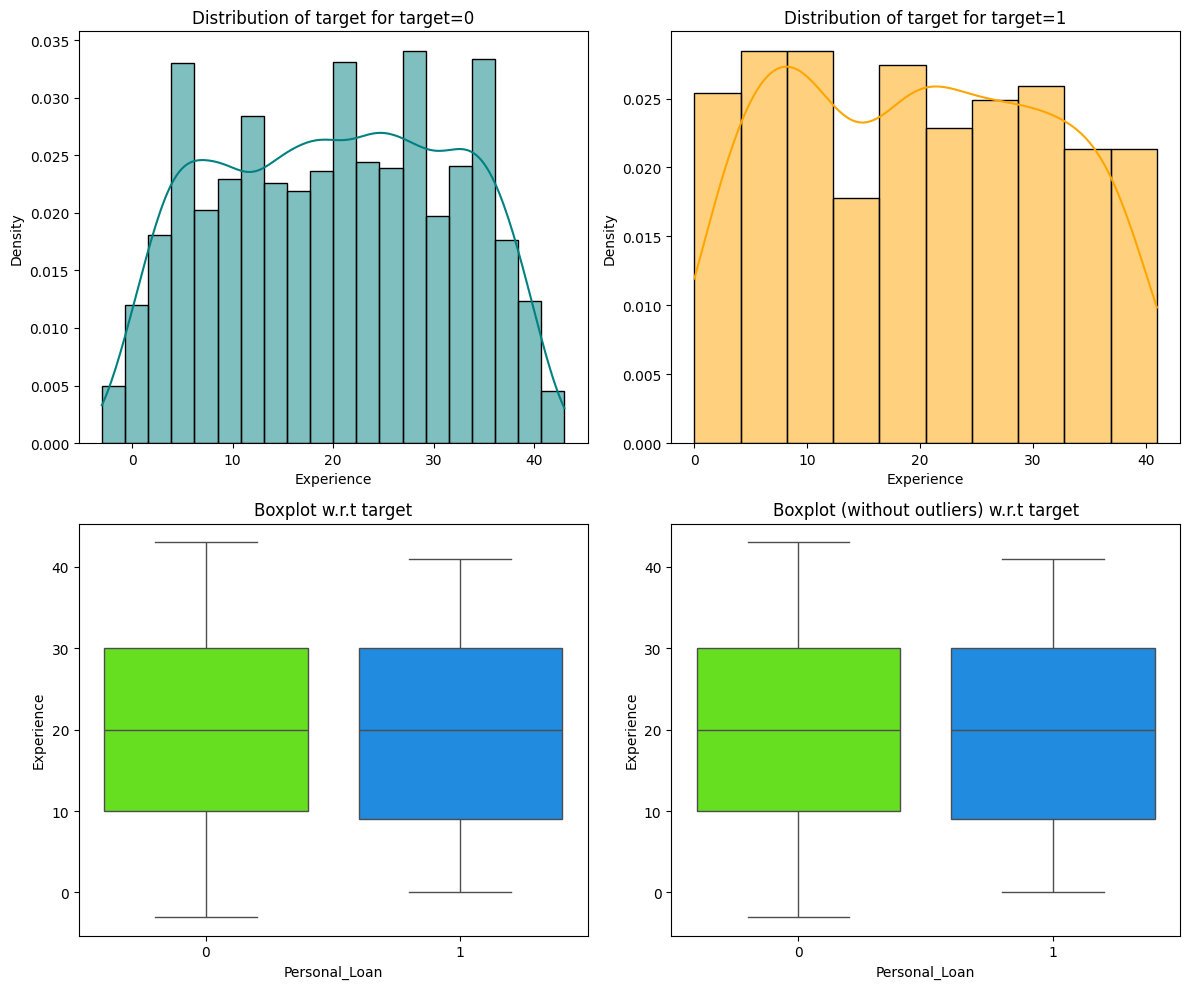

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan") # plot stacked barplot for Personal Loan and Experience

#### Personal Loan vs Income

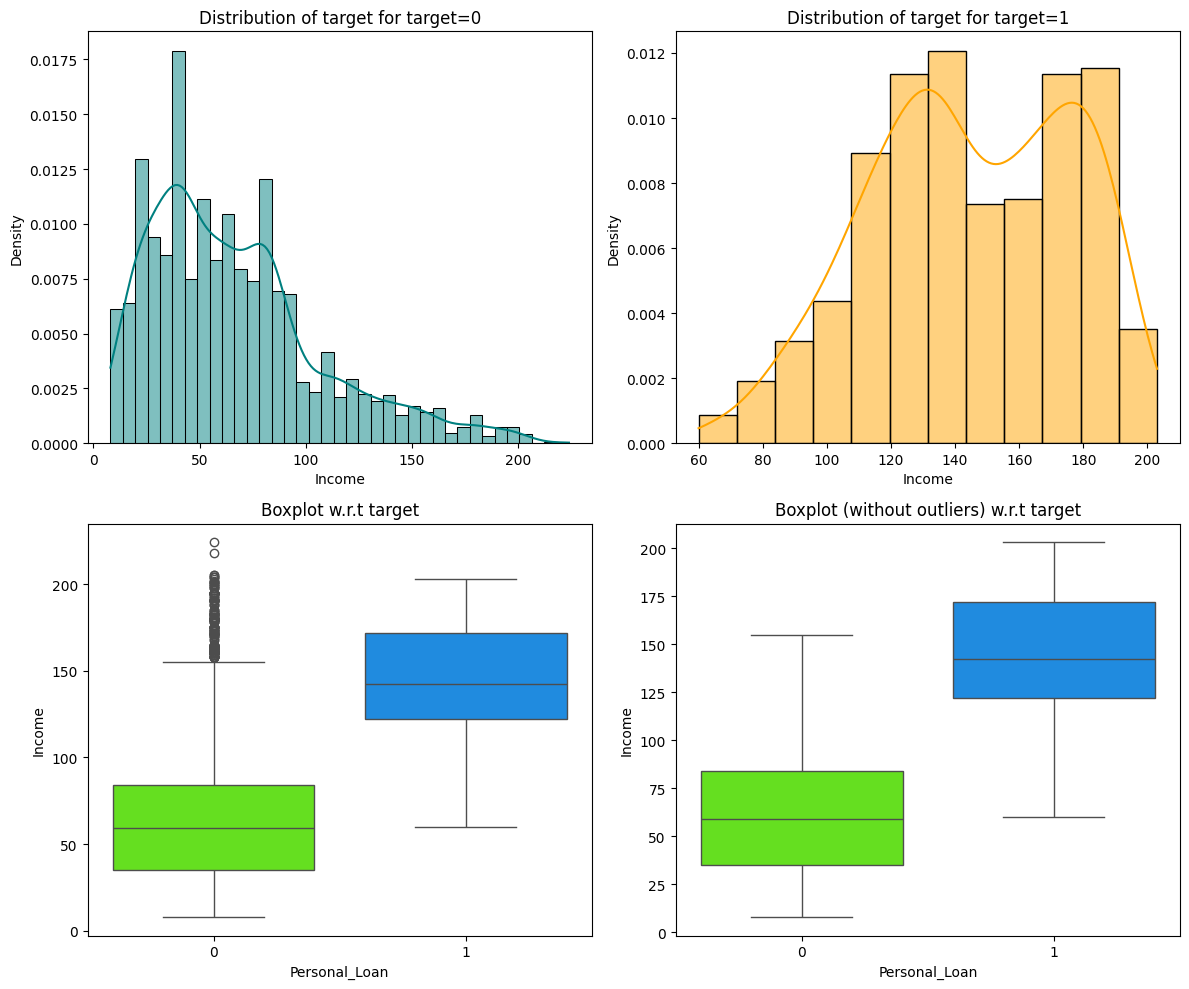

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan") # plot stacked barplot for Personal Loan and Income

**Observations:**


*   There are large number of values on higher side above 75 percentile.
*   For customers with personal loan, income vs personal loan graph shows left skew.
*   For customers without personal loan, income vs personal loan graph shows right skew.



#### Personal Loan vs CCAvg

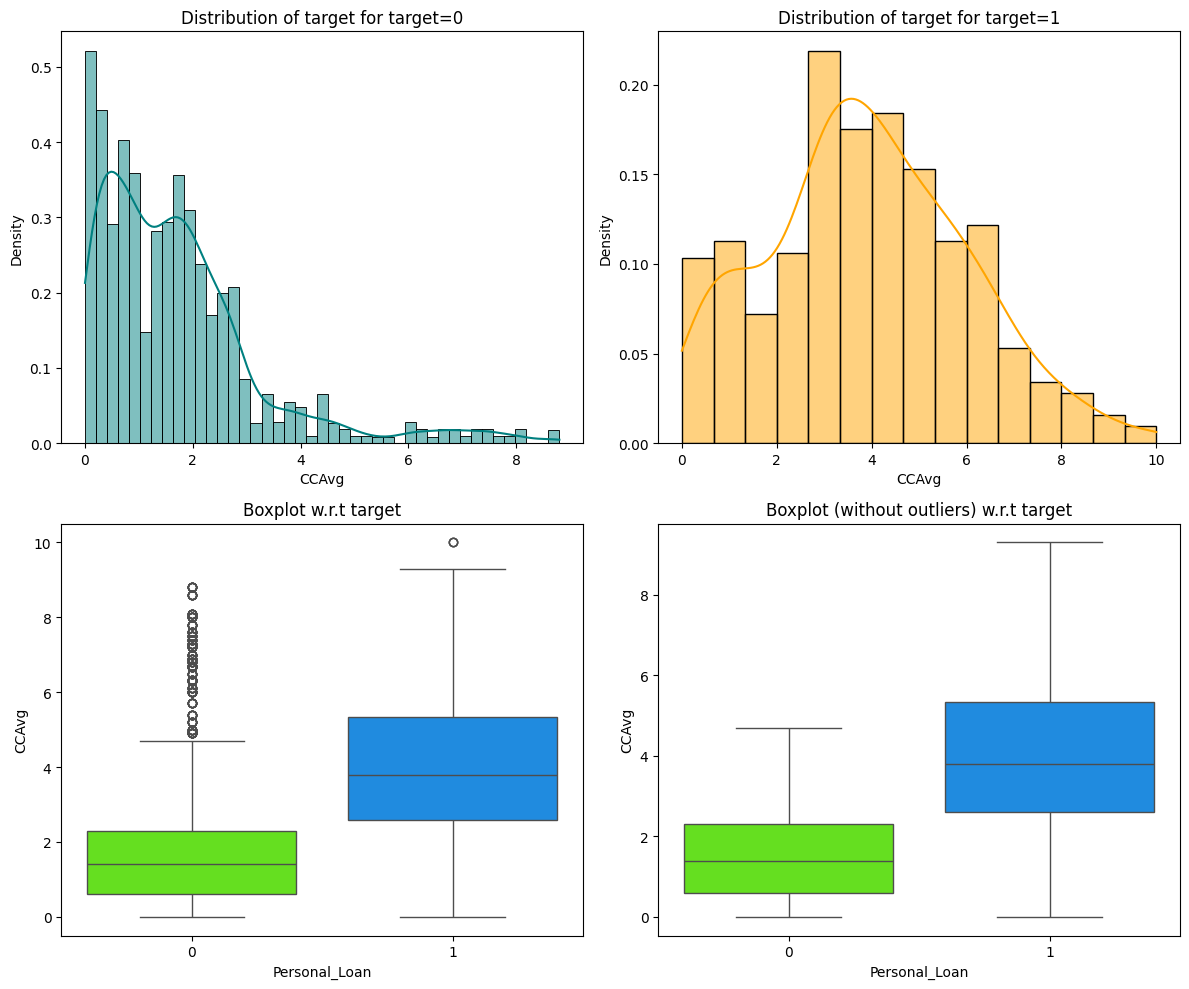

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan") # plot stacked barplot for Personal Loan and CCAvg

**Observations:**


*   For customers without personal loan, there are a large number of outliers above 75 percentile.
*   The CCavg vs personal loan data shows right skew.



### Conclusion from EDA

*  Income, Experience, Age have signifant correlation with Personal Loan
*  Education, Mortgage and CD_Account also show  correlation with Personal_Loan
* All other columns shows they have no significant correlation with Personal_Loan.
* Income: Customers who accepted a loan have high income ( mean ~145k) than those who don't (mean ~65k).
* Education: Graduate and advanced degree customers ( level 2 & 3) are more likely to accept a loan in comparision to Undergrad ( level 1).
* Age: Customers with age 35-55 are more likely to accept the loan.
* Experience: Customers with experience 10-30 years are more likely to accept a loan.
* Mortgage: Customers who accepted the loan have high mortgage value (mean ~100k) than those who didn't and have low mortgage (mean ~50k)

#Data Preprocessing


*   Missing value treatment
*   Feature engineering (if needed)
*   Preparing data for modeling
*   Outlier detection and treatment (if needed)
Any other preprocessing steps (if needed)


## Drop ID column

In [ ]:
# drop ID column from the data
data = data.drop(["ID"], axis=1)

## Check for Anomalies in data

### Experience column

*   The statistical analayis above shows experience column has min value of -3. As number of years of experience cannot be negative this is likely a data anomaly.



In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

## Feature Engineering



*   Zipcode column has 467 unique values, by taking the first two digits of the zip code, we can reduce the number of unique values for this column to be converted to categorical column


In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[categorical_cols] = data[categorical_cols].astype("category")

In [ ]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


## Outlier Detection

In [ ]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

def show_outliers(feature: str, data):
    """
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Obtain Percentage of Outliers to Total Rows
((data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
CCAvg,6.48
Mortgage,5.82


In [ ]:
outliers = show_outliers('Mortgage', data)
outliers.sort_values(by='Mortgage', ascending=False).head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2934,37,13,195,91,2,6.5,1,635,0,0,0,1,0
303,49,25,195,95,4,3.0,1,617,1,0,0,0,0
4812,29,4,184,92,4,2.2,3,612,1,0,0,1,0
1783,53,27,192,94,1,1.7,1,601,0,0,0,1,0
4842,49,23,174,95,3,4.6,2,590,1,0,0,0,0


**Mortgage**

No outlier treamtment needed

In [ ]:
outliers = show_outliers('CCAvg', data)
outliers.sort_values(by='CCAvg', ascending=False).head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2337,43,16,201,95,1,10.0,2,0,1,0,0,0,1
787,45,15,202,91,3,10.0,3,0,1,0,0,0,0
2101,35,5,203,95,1,10.0,3,0,1,0,0,0,0
3943,61,36,188,91,1,9.3,2,0,1,0,0,0,0
3822,63,33,178,91,4,9.0,3,0,1,0,0,0,0


**CCAvg**

**High Income => High Spending on CC**
No outlier treatment needed

In [ ]:
outliers = show_outliers('Income', data)
outliers.sort_values(by='Income', ascending=False).head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,24,224,93,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91,2,6.67,1,0,0,0,0,1,0
526,26,2,205,93,1,6.33,1,271,0,0,0,0,1
2988,46,21,205,95,2,8.80,1,181,0,1,0,1,0
4225,43,18,204,91,2,8.80,1,0,0,0,0,1,0


**Income**

No outlier treatment needed, just high earners

## Data Preparation for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
# drop column Personal Loan as it is Target
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode"], drop_first=True)
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


In [ ]:
X_train.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_2,Education_3
1334,47.0,35.0,2.0,1.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4768,38.0,39.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
65,59.0,131.0,1.0,3.8,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,29.0,65.0,4.0,1.8,244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4489,39.0,21.0,3.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X.shape

(5000, 17)

In [ ]:
Y.shape

(5000,)

### Observations:


*   There are 5000 rows and 17 columns in the data. The training set has 3500 rows and test set has 1500 rows.
*   ~90% of rows belong to class 0 (didn't purchase a loan) and less than 10% of rows belong to class 1 (purchased loan), the proportion is same for both test and train data sets.



# Model Building

In [ ]:
#### Helper functions #####

# function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # Accuracy
    acc = accuracy_score(target, pred)
    # Recall
    recall = recall_score(target, pred)
    # Precision
    precision = precision_score(target, pred)
    # F1-score
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# Function to compute confusion matrix with percentages

def confusion_matrix_sklearn(model, predictors, target):
    """
    Function to compute confusion matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def display_tree(decision_tree, feature_names):
  '''
  Display decision tree
  '''
  plt.figure(figsize=(10, 10))
  out = tree.plot_tree(
      estimator_pre_prune,
      feature_names=feature_names,
      filled=True,
      fontsize=9,
      node_ids=False,
      class_names=None,
  )
  # below code will add arrows to the decision tree split if they are missing
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("black")
          arrow.set_linewidth(1)
  plt.show()

### Decision Tree (sklearn default)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Checking model performance on training data

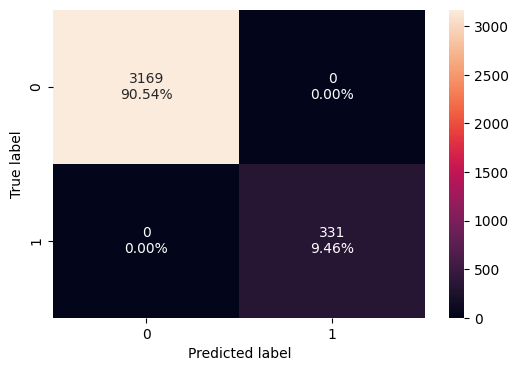

In [ ]:
# confusion matrix of train data
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Model performance of train data without class_weight

decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test data

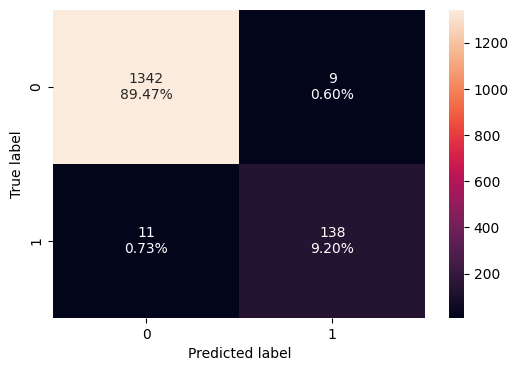

In [ ]:
# Confusion matrix for test data without class_weight
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Model performance on test data without class_weight
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986667,0.926174,0.938776,0.932432


#### **Observations for Decision Tree (sklearn default):**


*   The accuracy, recall, percision and F1 score have a value of 1.0 for the training set, indicating overfitting.
*   The performance for the training vs test model shows high variance, indicating overfitting of training data.
*   In both training and test sets, there are less than 10% positive class, so accuracy is not the best metric to evaluate the model.
*   As the positive class is minority class, we can experiment with **class_weight=balanced** hyperparameter during model building.

### Decision Tree (with class_weight)


*   As there are less than 10% instances of postive class, the decision tree will become biased towards the negative class.
*   By setting the hyperparameter **class_weight='balanced'** in DecisionTreeClassifier, it will automatically adjust the weights to be inversely proprtional to the class frequencies in the data.



In [ ]:
# Create Decision Tree model with class_weight
model_w_class_weight = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
model_w_class_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### Checking performance for training data for Decision tree ( with class_weight)

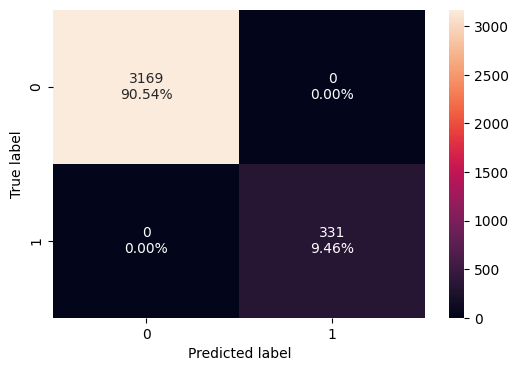

In [ ]:
# Confusion matrix for training data with class_weight='balanced'
confusion_matrix_sklearn(model_w_class_weight, X_train, y_train)

In [ ]:
# Model performance on train data with class_weight='balanced'
decision_tree_perf_train_w_class_weight = model_performance_classification_sklearn(model_w_class_weight, X_train, y_train)
decision_tree_perf_train_w_class_weight

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking performance for test data for Decision tree ( with class_weight)

In [ ]:
# Model performance on test data with class_weight
decision_tree_perf_test_w_class_weight = model_performance_classification_sklearn(model_w_class_weight, X_test, y_test)
decision_tree_perf_test_w_class_weight

,Accuracy,Recall,Precision,F1
0,0.98,0.872483,0.921986,0.896552


#### Observations on Decision Tree model ( with class_weight balanced)
*   Adjusting hyperparamter to class_weight='balanced' increased the difference in recall for train and test data.
*   Accuracy, Recall, Precision and F1 score still have a value of 1.0 for the training set which indicates that the model is overfitting.
*   The performance of the model still shows a large disparity in performance on train and test data, indicating that the model is still overfitting.
*  We need to experiment more with hyperparameter tuning




### Visualizing the Decision Tree & Feature Importance Decision Tree (sklearn default)

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


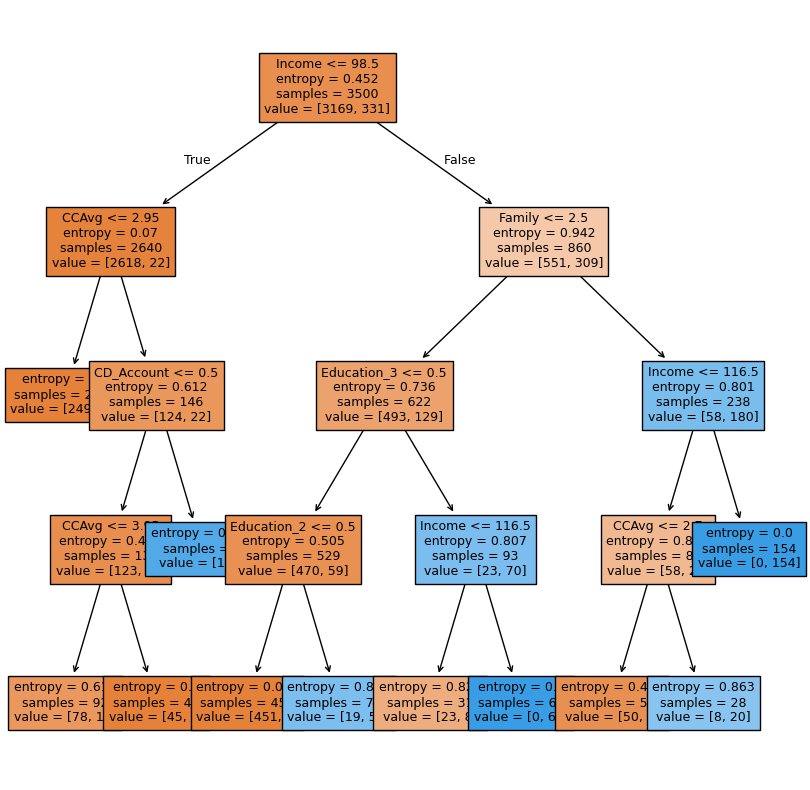

In [ ]:
display_tree(model, feature_names)

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Education_3 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.310517
Family              0.260924
Education_2         0.166192
Education_3         0.147961
CCAvg               0.048499
Age                 0.032316
CD_Account          0.017273
ZIPCode_94          0.007183
Mortgage            0.003236
ZIPCode_92          0.003080
Online              0.002224
ZIPCode_93          0.000594
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


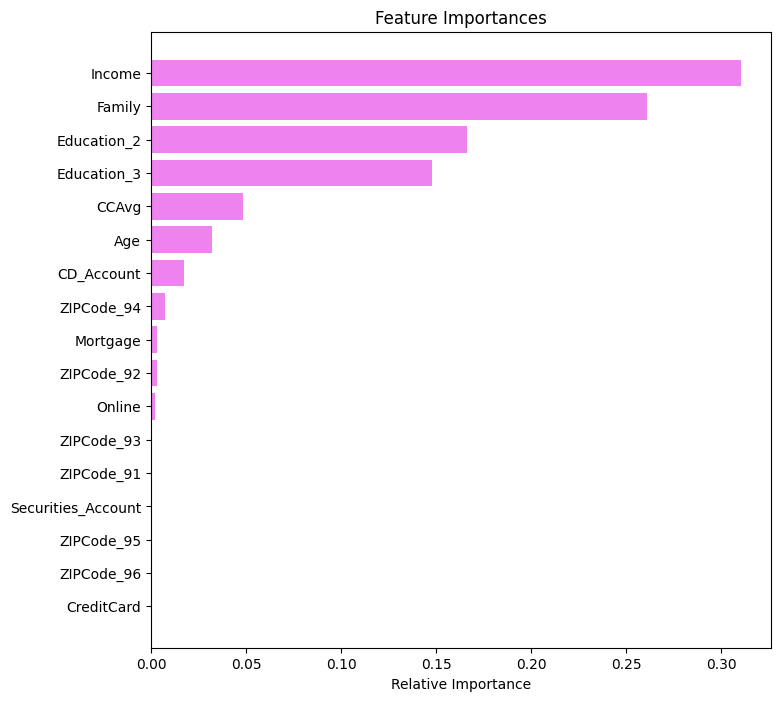

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Income, Family Size, Education Level Graduate and Above have higher chance of procuring a loan.



# Model Evaluation Criterion

Model can make wrong predictions as:

1. **False Negatives**: Predicting a customer is not going to take personal loan but in reality the customer will take (predicting class 1 as class 0) - This will be an **Opportinity Loss**
2. **False Positive**: Predicting a customer is going to take a personal loan (class 1) but in reality the customer will not take (predicting class 0 as class 1) - This will be **Loss of marketing resources**
**Which Loss is greater** ?
* **Opportunity loss** will be the greater loss as the bank will lose revenue and possibly the customer
How to reduce this loss i.e need to reduce False Negatives ?
* The bank needs to reduce false negatives, this can be done by maximizing the Recall.

# Model Performance Improvement

### Decision Tree (Pre Pruning)


*   Hyperparameter tuning is crucial because it directly affects the performance of a model.
*   Unlike model parameters which are learned during training, hyperparameters need to be set before training.
*   Effective hyperparameter tuning helps in improving the performance and robustness of the model.
*   The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

#### Hyperparameter Tuning

In [ ]:
# Decision Tree model (pre-pruning) Custom Loop
# No class weight, criterion entropy to get balanced tree

# Define hyperparameters
max_depth_values = np.arange(2, 15, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]
class_weight_values=[{0: 0.15, 1: 0.85}, None]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
              # Initialize the tree with the current set of parameters
              estimator_pre_prune = DecisionTreeClassifier(
                  max_depth=max_depth,
                  max_leaf_nodes=max_leaf_nodes,
                  min_samples_split=min_samples_split,
                  random_state=42,
                  criterion='entropy'
              )
              # Fit the model to the training data
              estimator_pre_prune.fit(X_train, y_train)

              # Make predictions on the training and test sets
              y_train_pred = estimator_pre_prune.predict(X_train)
              y_test_pred = estimator_pre_prune.predict(X_test)

              # Calculate recall scores for training and test sets
              train_recall_score = recall_score(y_train, y_train_pred)
              test_recall_score = recall_score(y_test, y_test_pred)

              # Calculate the absolute difference between training and test recall scores
              score_diff = abs(train_recall_score - test_recall_score)

              # Update the best estimator and best score if the current one has a smaller score difference
              if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                  best_score_diff = score_diff
                  best_test_score = test_recall_score
                  best_estimator = estimator_pre_prune

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")
print(f"Best criterion: {best_estimator.criterion}")

Best parameters found:
Max depth: 4
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.8523489932885906
Best criterion: entropy


In [ ]:
# Fit the best algorithm to the data.
estimator_pre_prune = best_estimator
estimator_pre_prune.fit(X_train, y_train) # fit model on train data

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

#### Checking performance for train data

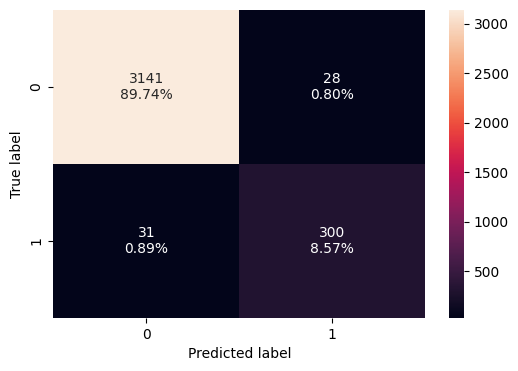

In [ ]:
confusion_matrix_sklearn(estimator_pre_prune, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator_pre_prune, X_train, y_train) ## check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.983143,0.906344,0.914634,0.91047


#### Checking performance for Test Data

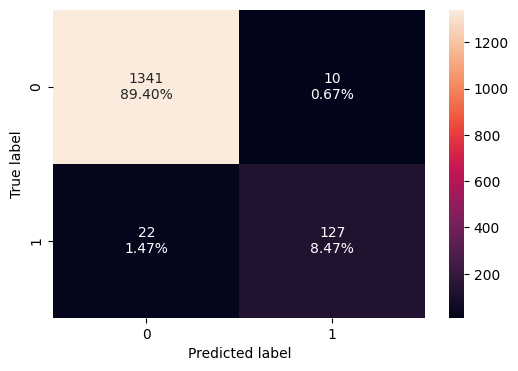

In [ ]:
confusion_matrix_sklearn(estimator_pre_prune,  X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator_pre_prune, X_test, y_test) ## check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.852349,0.927007,0.888112


#### Visualising the Decision Tree (Pre Pruning)

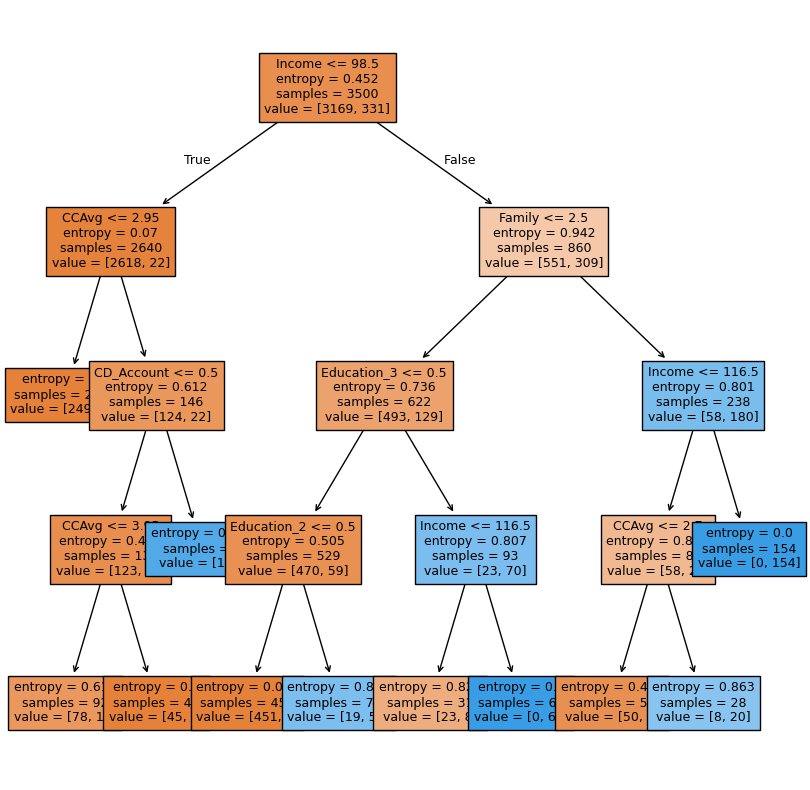

In [ ]:
display_tree(estimator_pre_prune, feature_names)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_pre_prune, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [78.00, 14.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [1.00, 8.00] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [451.00, 3.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [19.00, 56.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [23.00, 8.00] class: 0
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.70
|   |   |   |   |--- weights: [50.00, 6.00] class: 0


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_pre_prune.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.554957
Education_2         0.132576
Family              0.119170
CCAvg               0.093129
Education_3         0.085731
CD_Account          0.014437
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
Age                 0.000000
ZIPCode_92          0.000000
ZIPCode_91          0.000000
Online              0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


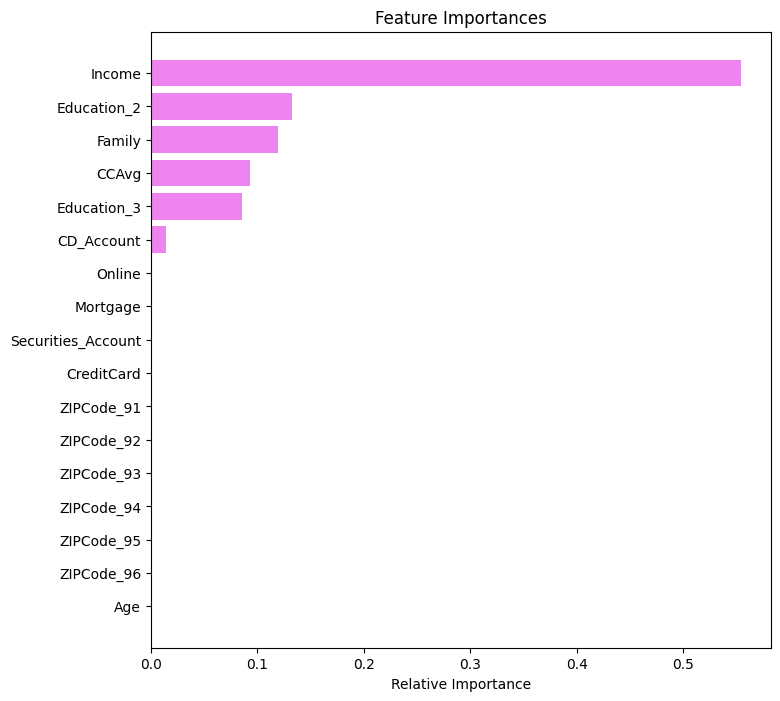

In [ ]:
importances = estimator_pre_prune.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Conclusion

*  The decision tree has a smaller depth but still low recall.
As we have not explored all the combinations of hyperparameters we can also GridSearchCV technique

#### Hyperparameters tuning with GridSearchCV

In [ ]:
# Create Decision Tree model with pre-pruning
model_pre_prune_cv = DecisionTreeClassifier(random_state=42)

# Define hyperparameters
parameters = {
  'class_weight': [{0: 0.15, 1: 0.85}],
  'max_depth': [np.arange(1, 15), None],
  'max_leaf_nodes': [50, 75, 150, 250],
  'min_samples_split': [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(model_pre_prune_cv, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
model_pre_prune_cv = grid_obj.best_estimator_

# Fit the best algorithm to the data
model_pre_prune_cv.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_leaf_nodes=50,
                       min_samples_split=70, random_state=42)

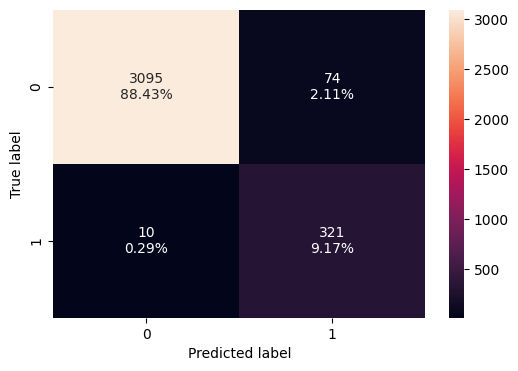

In [ ]:
confusion_matrix_sklearn(model_pre_prune_cv, X_train, y_train)

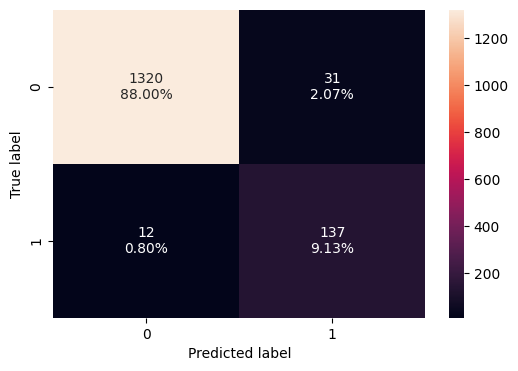

In [ ]:
confusion_matrix_sklearn(model_pre_prune_cv, X_test, y_test)

In [ ]:
# Display the model performance of train data with pre-pruning
decision_tree_perf_train_pre_prune_cv = model_performance_classification_sklearn(model = model_pre_prune_cv, predictors = X_train, target = y_train)

decision_tree_perf_train_pre_prune_cv

,Accuracy,Recall,Precision,F1
0,0.976,0.969789,0.812658,0.884298


In [ ]:
# Display the model performance of train data with pre-pruning
decision_tree_perf_test_pre_prune_cv = model_performance_classification_sklearn(model_pre_prune_cv, X_test, y_test)

decision_tree_perf_test_pre_prune_cv

,Accuracy,Recall,Precision,F1
0,0.971333,0.919463,0.815476,0.864353


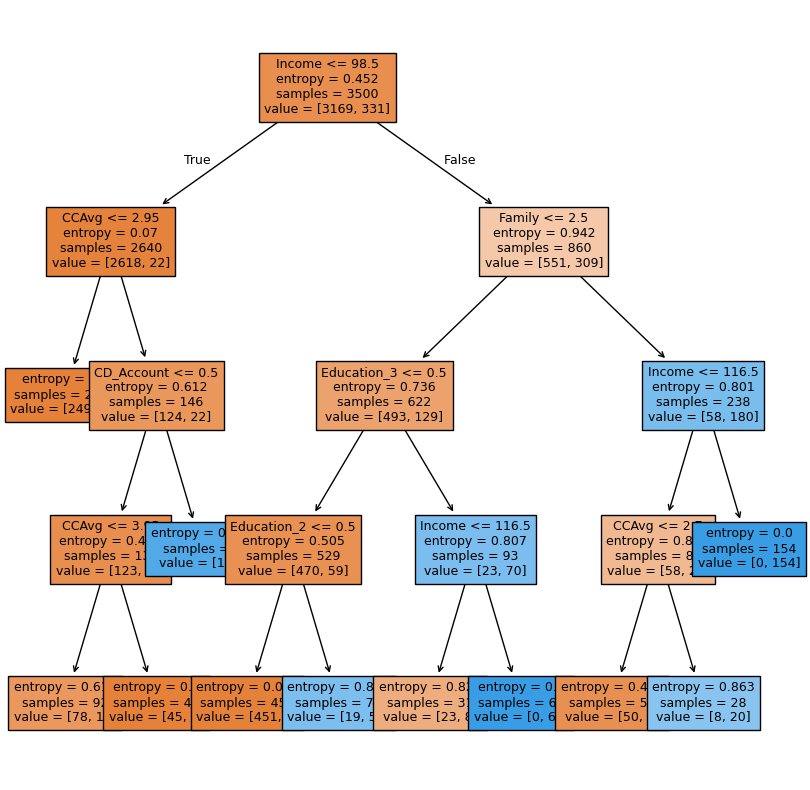

In [ ]:
display_tree(model_pre_prune_cv, feature_names)

#### Conclusion

1. The difference between the recall for test and training data is still high, we can try cost complexity pruning.

#### Cost Complexity pruning

*  In DecisionTreeClassifier, this pruning technique is
parameterized by the cost complexity parameter, ccp_alpha
*  Greater values of ccp_alpha increase the number of nodes pruned.
*  Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [ ]:
clf = DecisionTreeClassifier(random_state=42, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-5.804814e-15
1,7.482671e-19,-5.804066e-15
2,7.482671e-19,-5.803318e-15
3,7.482671e-19,-5.802570e-15
4,7.482671e-19,-5.801821e-15
5,1.760629e-18,-5.800061e-15
6,1.760629e-18,-5.798300e-15
7,1.892676e-18,-5.796407e-15
8,2.332833e-18,-5.794075e-15
9,2.332833e-18,-5.791742e-15


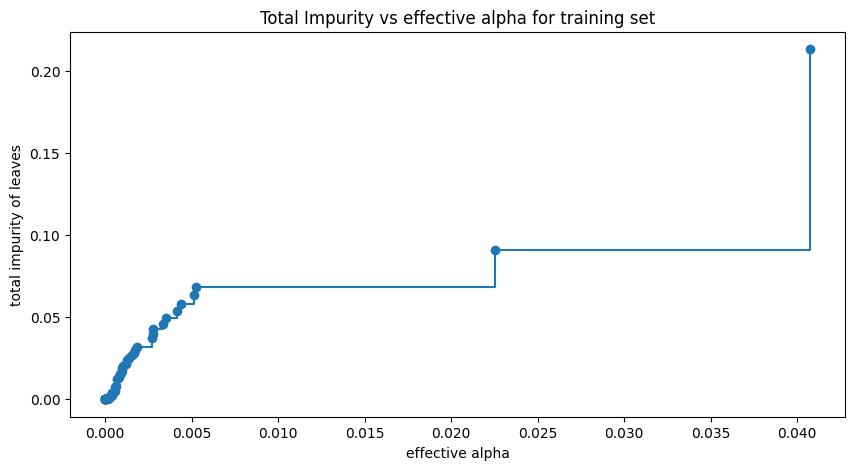

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85})
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480995


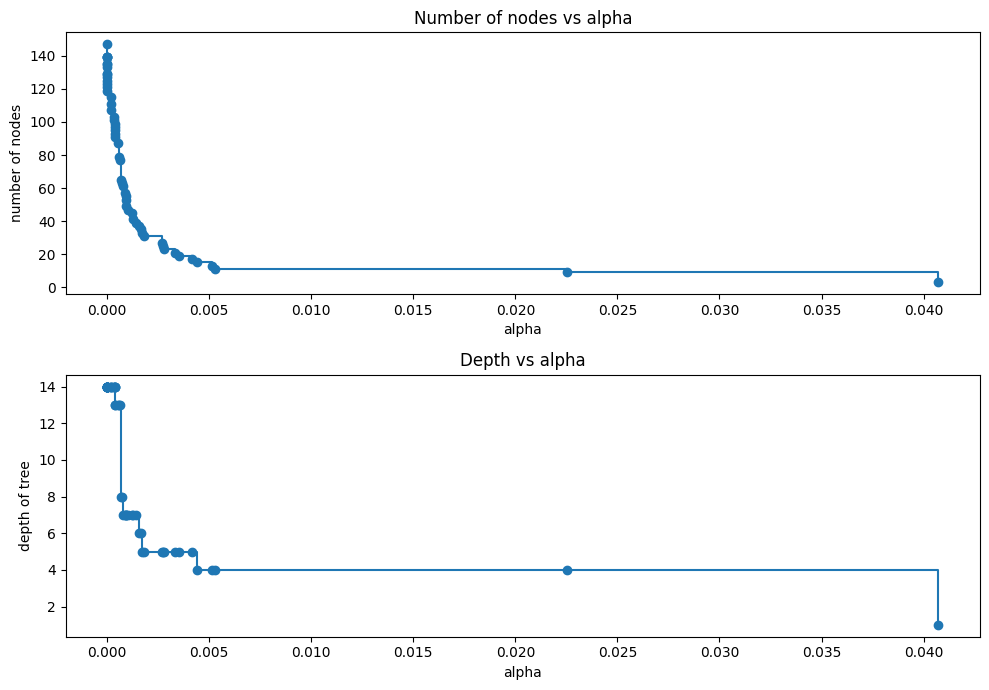

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

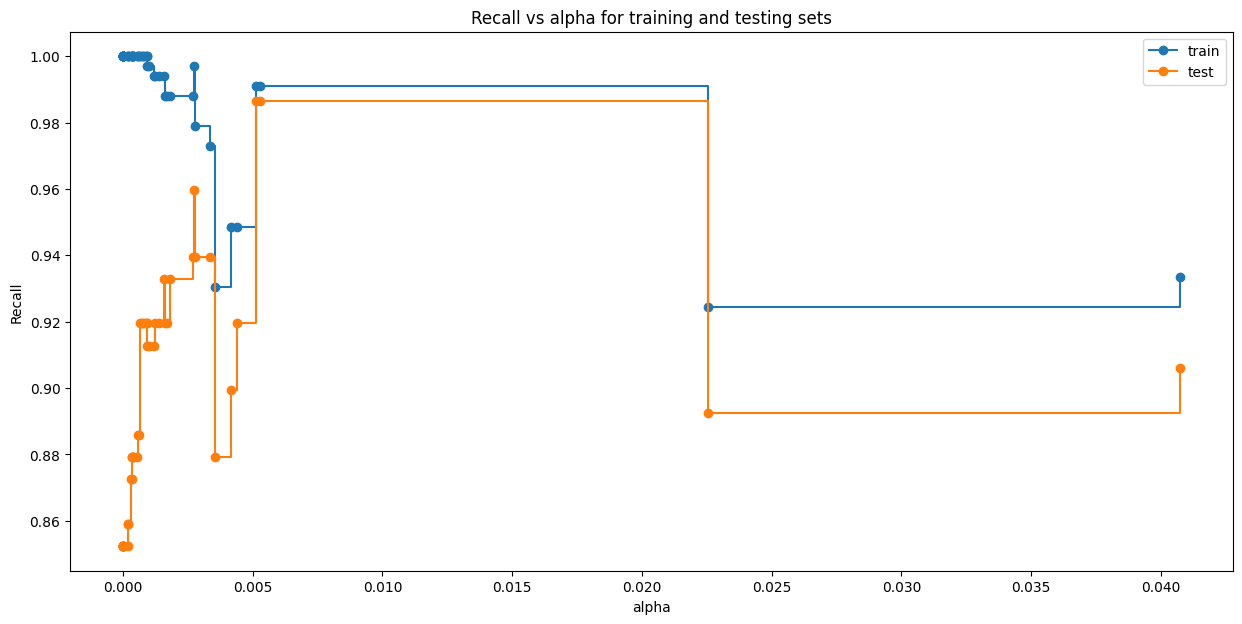

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0051382800165540796,
                       class_weight={0: 0.15, 1: 0.85}, random_state=42)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    class_weight={0: 0.15, 1: 0.85},
    ccp_alpha=0.0051382800165540796, random_state=42     ## adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0051382800165540796,
                       class_weight={0: 0.15, 1: 0.85}, random_state=42)

#### **Checking performance on training data**

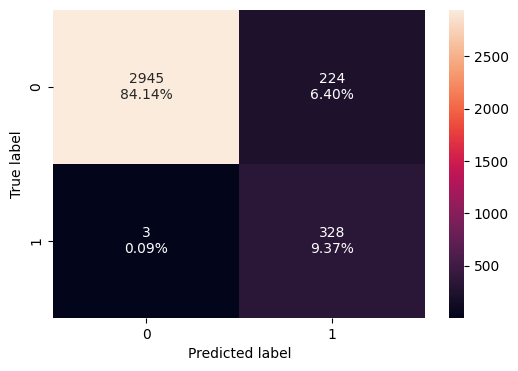

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) # create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) # check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.935143,0.990937,0.594203,0.742922


#### **Checking performance on test data**

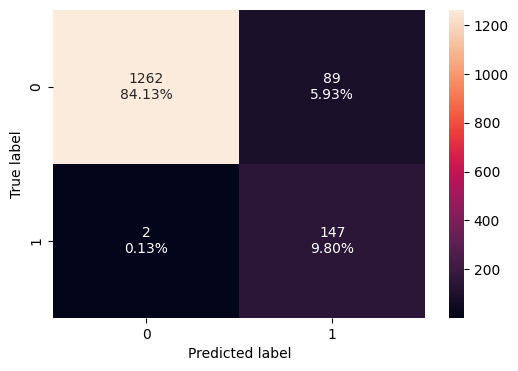

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) # get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.939333,0.986577,0.622881,0.763636


#### **Visualizing the Decision Tree**

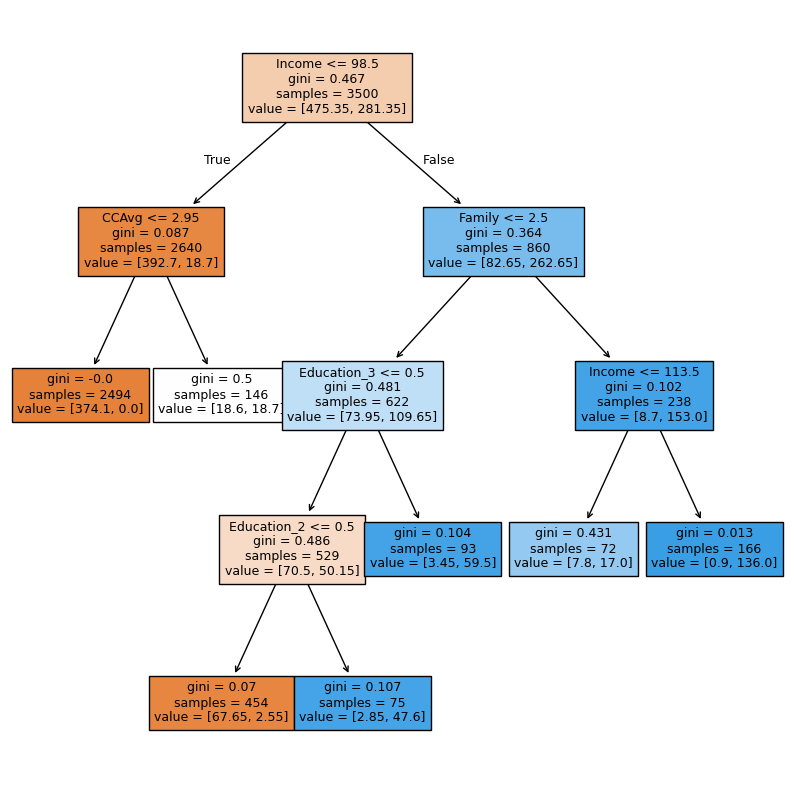

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- weights: [7.80, 17.00] class: 1
|   |   |--- Income >  113.50
|   |   |   |--- weights: [0.90, 136.00] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.641593
Education_2         0.158136
Education_3         0.075928
Family              0.068540
CCAvg               0.055804
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
Age                 0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


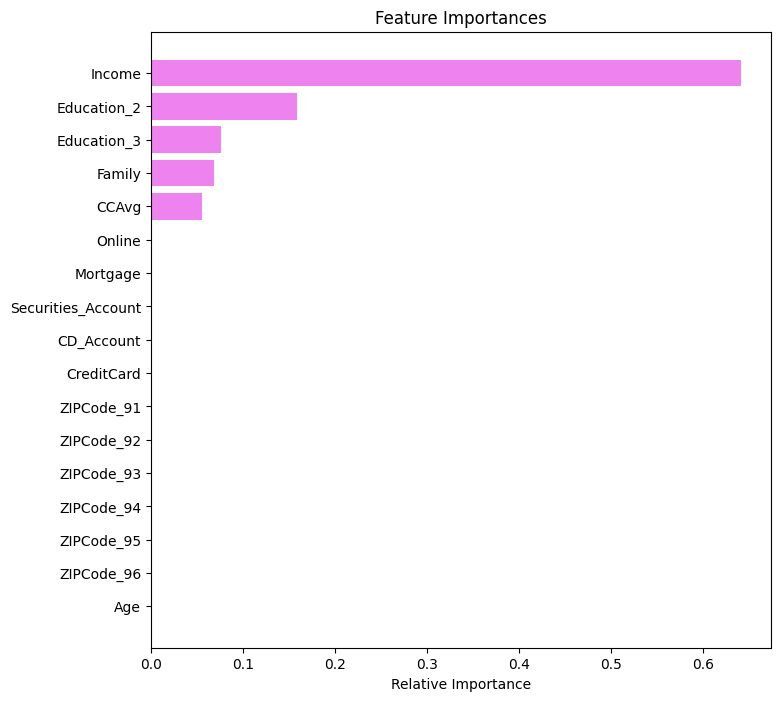

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_perf_train_w_class_weight.T, decision_tree_tune_perf_train.T, decision_tree_perf_train_pre_prune_cv.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (with class_weight)", "Decision Tree (Pre-Pruning)", "Decision Tree (Pre-Pruning GridSearchCV)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (with class_weight),Decision Tree (Pre-Pruning),Decision Tree (Pre-Pruning GridSearchCV),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.983143,0.976000,0.935143
Recall,1.0,1.0,0.906344,0.969789,0.990937
Precision,1.0,1.0,0.914634,0.812658,0.594203
F1,1.0,1.0,0.910470,0.884298,0.742922


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_perf_test_w_class_weight.T, decision_tree_tune_perf_test.T, decision_tree_perf_test_pre_prune_cv.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (with class_weight)", "Decision Tree (Pre-Pruning)", "Decision Tree (Pre-Pruning GridSearchCV)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (with class_weight),Decision Tree (Pre-Pruning),Decision Tree (Pre-Pruning GridSearchCV),Decision Tree (Post-Pruning)
Accuracy,0.986667,0.980000,0.978667,0.971333,0.939333
Recall,0.926174,0.872483,0.852349,0.919463,0.986577
Precision,0.938776,0.921986,0.927007,0.815476,0.622881
F1,0.932432,0.896552,0.888112,0.864353,0.763636


### Observations:


*   The accuracy, precision, F1 score all improve post-pruning for test data.
*   The Decision Tree (post-pruning) model is the best as it shows highest recall score on both training and test sets than the Decision Tree (pre-pruning) method.
Recall for Training Data = 0.99
Recall for Test Data = 0.9865
Hyperparameters used:
    *   random_state = 42
    *   class_weight = {0: 0.15, 1: 0.85}
    *   ccp_alpha = 0.0051382800165540796

*   As the difference in Recall between the training and test data is less with Post Pruning Method and hence, the model shows generalizability.

* Feature importance shows the most important factor to customers when accepting a loan is as follows ( with feature importance score):
    * Income              0.641593
    * Education_2.0       0.158136
    * Education_3.0       0.075928
    * Family              0.068540
    * CCAvg               0.055804
In conclusion, high income and higher level of education greatly influence the propbability of accepting a loan.
* The Decision Tree (Post-pruning) model shows that it can predict the customer will accept a loan if the customer meet the following conditions:

    * Income is greater than 98.5K
    Education level is less than or equal 1
    Family size is greater than 2
    OR
    * Income is greater than 98.5K
    Education level is greater than 1
    OR
    * Income is less than or equal 98.5K
    CCAvg is greater than 2.95K

# Actionable Insights and Business Recommendations


### Conclusion

*   The Decision Tree (post-pruning) model is the best as it shows highest recall score on both training and test sets than the Decision Tree (pre-pruning) method.
Recall for Training Data = 0.99
Recall for Test Data = 0.9865
*  The model shows greater generalizability and avoids overfitting.
* The Decision Tree (Post-pruning) model shows that it can predict the customer will accept a loan if the customer meet the following conditions:

    * Income is greater than 98.5K
    Education level is less than or equal 1
    Family size is greater than 2
    OR
    * Income is greater than 98.5K
    Education level is greater than 1
    OR
    * Income is less than or equal 98.5K
    CCAvg is greater than 2.95K

*   As the difference in Recall between the training and test data is less with Post Pruning Method and hence, the model shows generalizability.

* Feature importance shows that Income (close to 0.66), Family (close to 0.16), Education (close to 0.14) and CCAvg (close to 0.055) are the most important factors in predicting potential loan customers.

### What recommedations would you suggest to the bank?

* For higher rate of personal loan acceptance, the bank should target the customers with the below attributes ( in descending order of importance):
  1. Higher income
  2. Family size of 3 & 4
  3. Higher education level: Graduates & Advanced/Professionals
  4. Higher CCAvg
  5. Higher mortgage values
  6. Having CD_accounts & Securities accounts

* Bank can prioritize customers with **higher Income & Education**, as these two are the most important features as per our model to identify a potential buyer.

*   We also know that customers with Credit Cards with Other banks, Securities Accounts and CD_Accounts have accepted personal loans in past with slightly higher probability, so the bank can also upsell Personal Loans to the customers with credit cards and securities or CD_Accounts.
* There can also be combo offers to non-customers for opening an account with the bank and applying for personal loan as well.




___